# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# For given used car data, we would like to find out the factors affecting the price of the used car.
# The price of the car is defined by many features ( e.g. automatic transmission is costlier than manual transmission)
# and there are some corelation between those features and the price.
# Our goal is to find the relationship of those features with the price and find out what kind of inventory 
# the dealer should carry to maximize the chance of selling. We might get some answers like
# 1. What features affect the cars prices most ?
# 2. What are the features buyers are least interested in ? 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight') 
plt.rcParams["figure.figsize"] = (15,8)
import numpy as np

from sklearn import preprocessing
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline

from datetime import datetime

# additional
import warnings
warnings.filterwarnings("ignore")
print("All modules uploaded")

All modules uploaded


In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
# check null values
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
# check unique values for each column
for col in df:
  print(col, ' = ', df[col].nunique())

id  =  426880
region  =  404
price  =  15655
year  =  114
manufacturer  =  42
model  =  29649
condition  =  6
cylinders  =  8
fuel  =  5
odometer  =  104870
title_status  =  6
transmission  =  3
VIN  =  118246
drive  =  3
size  =  4
type  =  13
paint_color  =  12
state  =  51


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
# Drop columns
# We will be dropping following columns
# 1 - VIN
# 2 - ID
df.drop(columns=["VIN", "id"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [9]:
# Get rid of outliers
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[df['price'] < fence_low ] = np.nan
df.loc[df['price'] > fence_high ] = np.nan

In [10]:
# Delete rows where important feature is missing
# year, manufacturer, model, cylinders, odometer, transmission, Price
# Than create index on manufacturer and model

df=df.dropna(subset=['year', 'manufacturer', 'model', 'cylinders', 'odometer', 'transmission', 'price'])
df=df.set_index(['manufacturer','model'])


In [11]:
df.isna().sum()

region               0
price                0
year                 0
condition        62669
cylinders            0
fuel              1128
odometer             0
title_status      5978
transmission         0
drive            32857
size            131690
type             24735
paint_color      45790
state                0
dtype: int64

In [12]:
# fill the values
# We have created index on manufacturer and model, so, we can replace the missing values using ffill method
# for the same model from previous record except condition
# we will replace the missing condition values as good 
# Also, we are assuming that all missing titles are clean

df["fuel"].fillna( method ='ffill', inplace = True)
df["drive"].fillna( method ='ffill', inplace = True)
df["size"].fillna( method ='ffill', inplace = True)
df["drive"].fillna( method ='bfill', inplace = True)
df["size"].fillna( method ='bfill', inplace = True)
df["type"].fillna( method ='ffill', inplace = True)
df["paint_color"].fillna( method ='ffill', inplace = True)
df['condition'].fillna('good', inplace=True)
df['title_status'].fillna('clean', inplace=True)

In [13]:
df.isna().sum()

region          0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [14]:
df=df.reset_index()

In [15]:
df.head()

,manufacturer,model,region,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,gmc,sierra 1500 crew cab slt,auburn,33590.0,2014.0,good,8 cylinders,gas,57923.0,clean,other,rwd,full-size,pickup,white,al
1,chevrolet,silverado 1500,auburn,22590.0,2010.0,good,8 cylinders,gas,71229.0,clean,other,rwd,full-size,pickup,blue,al
2,chevrolet,silverado 1500 crew,auburn,39590.0,2020.0,good,8 cylinders,gas,19160.0,clean,other,rwd,full-size,pickup,red,al
3,toyota,tundra double cab sr,auburn,30990.0,2017.0,good,8 cylinders,gas,41124.0,clean,other,rwd,full-size,pickup,red,al
4,ford,f-150 xlt,auburn,15000.0,2013.0,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [16]:
# encode the data

label_encoder= preprocessing.LabelEncoder()
df_encoded= df
for column in df_encoded.select_dtypes(include=object):
    df_encoded[column]=label_encoder.fit_transform(df_encoded[column])
    
df_encoded.head()


,manufacturer,model,region,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,14,13854,16,33590.0,2014.0,2,6,2,57923.0,0,2,2,1,8,10,1
1,7,14124,16,22590.0,2010.0,2,6,2,71229.0,0,2,2,1,8,1,1
2,7,14156,16,39590.0,2020.0,2,6,2,19160.0,0,2,2,1,8,8,1
3,38,16406,16,30990.0,2017.0,2,6,2,41124.0,0,2,2,1,8,8,1
4,13,7126,16,15000.0,2013.0,0,5,2,128000.0,0,0,2,1,10,0,1


In [17]:
# Change column types
df_encoded['year'] = df_encoded['year'].astype(int)
df_encoded['odometer'] = df_encoded['odometer'].astype(int)
df_encoded['price'] = df_encoded['price'].astype(int)

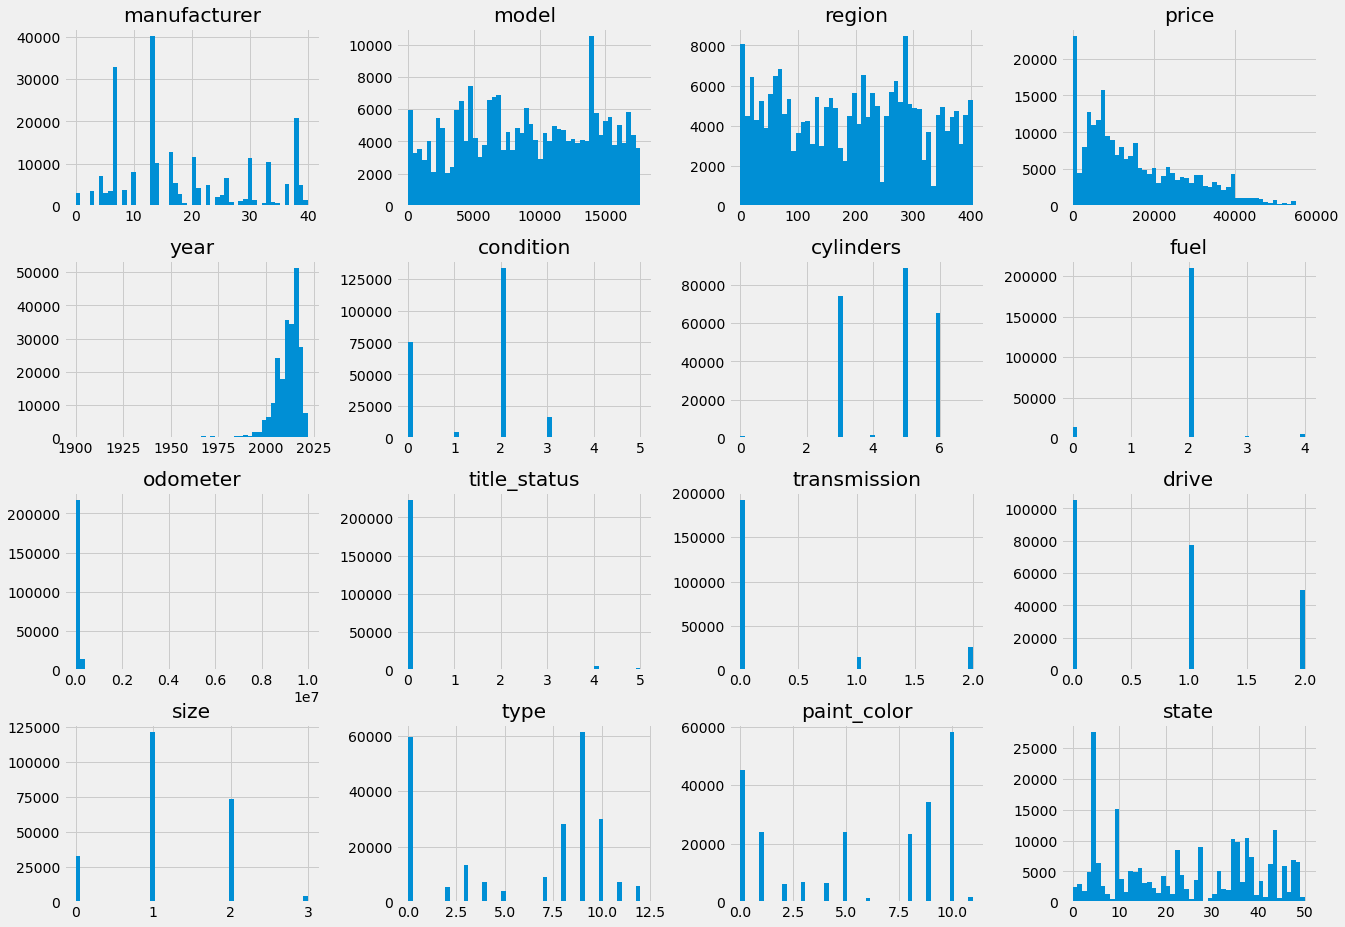

In [18]:
df_encoded.hist(bins=50, figsize=(20,15));

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231974 entries, 0 to 231973
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   manufacturer  231974 non-null  int32
 1   model         231974 non-null  int32
 2   region        231974 non-null  int32
 3   price         231974 non-null  int32
 4   year          231974 non-null  int32
 5   condition     231974 non-null  int32
 6   cylinders     231974 non-null  int32
 7   fuel          231974 non-null  int32
 8   odometer      231974 non-null  int32
 9   title_status  231974 non-null  int32
 10  transmission  231974 non-null  int32
 11  drive         231974 non-null  int32
 12  size          231974 non-null  int32
 13  type          231974 non-null  int32
 14  paint_color   231974 non-null  int32
 15  state         231974 non-null  int32
dtypes: int32(16)
memory usage: 14.2 MB


In [20]:
# find corelation

corr_matrix = df_encoded.corr()
corr_matrix
corr_matrix['price'].sort_values(ascending=False)

price           1.000000
transmission    0.351973
year            0.323634
cylinders       0.287665
condition       0.135018
model           0.060801
type            0.037629
paint_color     0.023920
size           -0.001423
state          -0.007195
region         -0.033506
manufacturer   -0.049612
title_status   -0.055910
fuel           -0.065528
drive          -0.086892
odometer       -0.169240
Name: price, dtype: float64

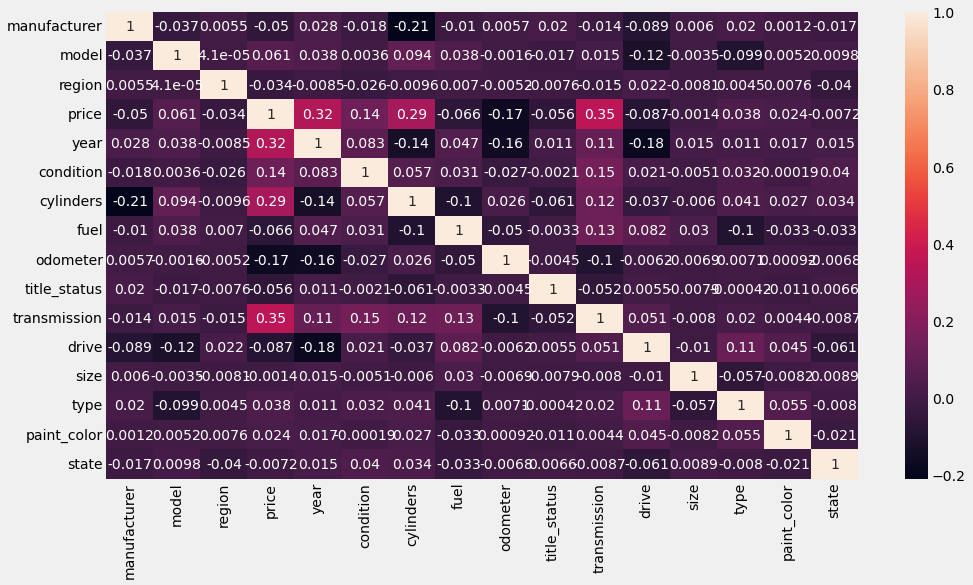

In [21]:
# Draw a graph of correlation
sns.heatmap(corr_matrix, annot=True);

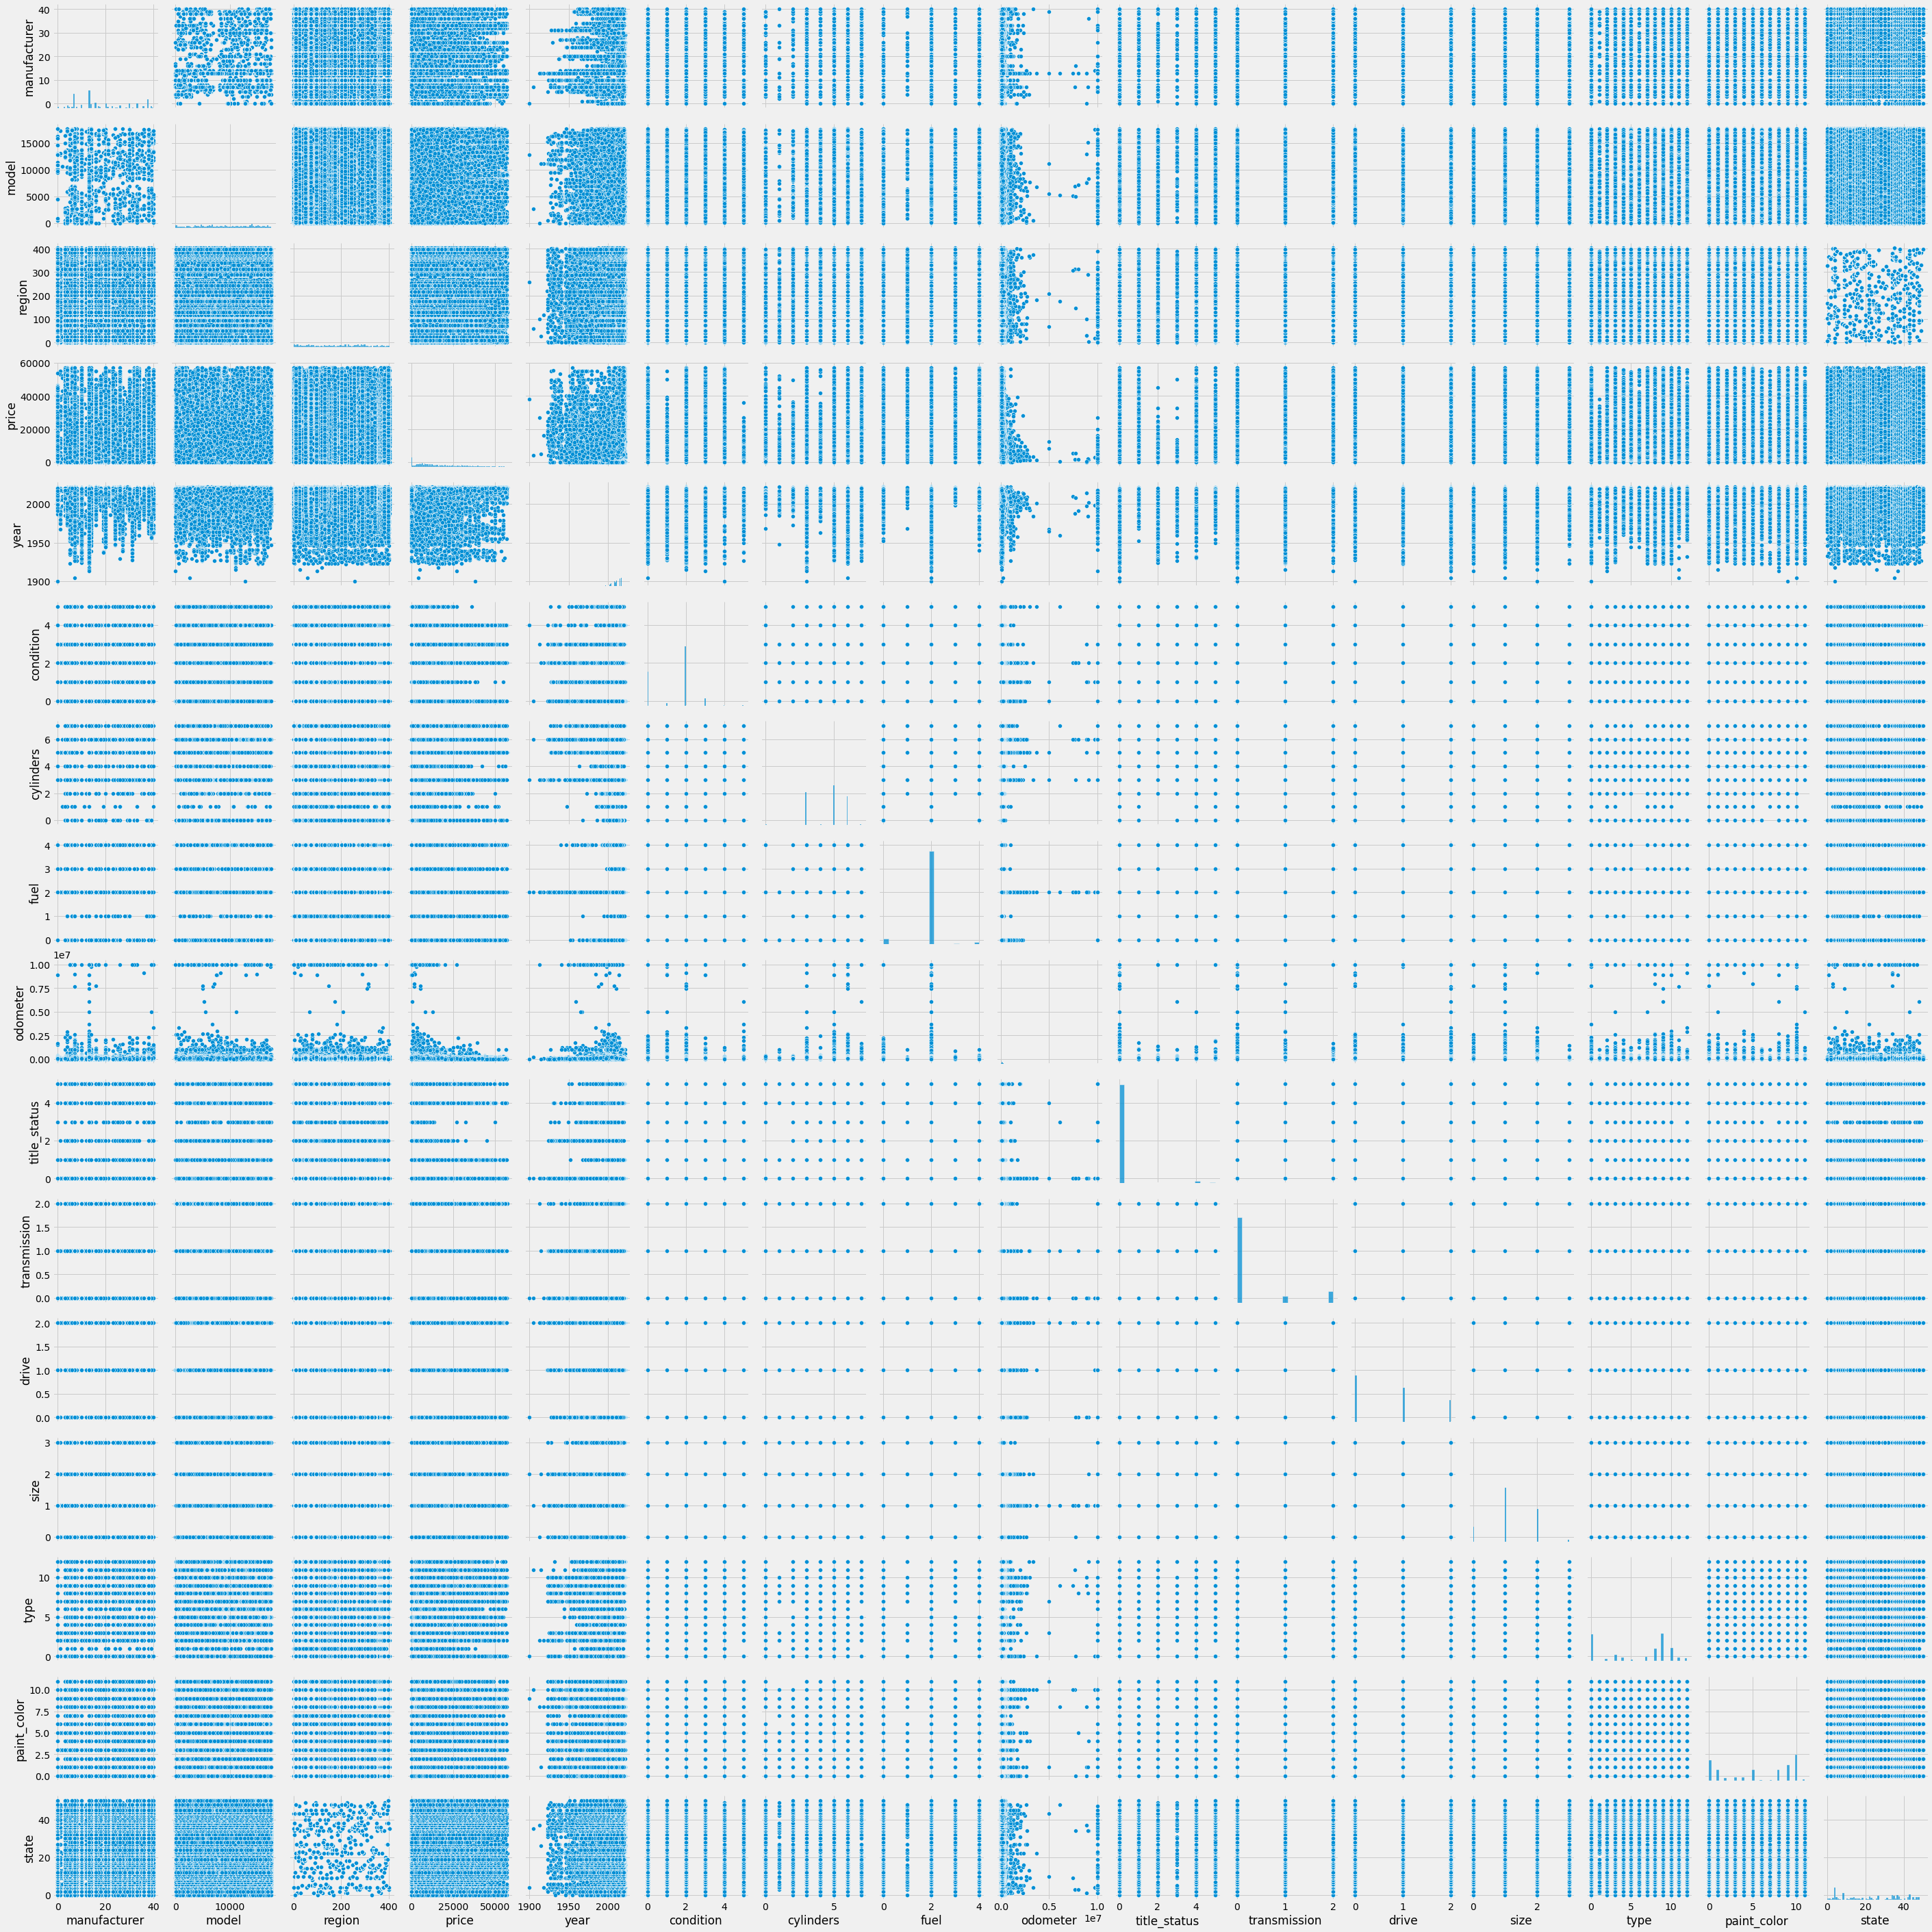

In [22]:
sns.pairplot(df_encoded);

In [23]:
# seperate x and y data

X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']


In [24]:
# Scale the data

X_scaled = StandardScaler().fit_transform(X)

In [25]:
# Perform Principal components analysis
pca = PCA(n_components=3)
pca_comp = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(data=pca_comp, columns=['pca1','pca2','pca3'])
X_pca.head(3)

,pca1,pca2,pca3
0,-0.792580,-2.782445,-1.497608
1,-0.586277,-2.907644,-1.066488
2,-1.249465,-2.995751,-1.415687


In [26]:
X = X_pca
y = y
y

0         33590
1         22590
2         39590
3         30990
4         15000
          ...  
231969    32990
231970        0
231971    33590
231972    23590
231973    28990
Name: price, Length: 231974, dtype: int32

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
X_train.head()

,pca1,pca2,pca3
212459,-1.215523,1.533401,0.954897
14490,0.471702,1.451243,-0.682862
32407,1.036407,0.368258,-0.363212
96285,1.004146,-1.127632,-1.082806
173679,0.927141,-0.512055,-0.081016


In [29]:
X_test.head()

,pca1,pca2,pca3
208273,-0.125196,1.478016,0.380612
49321,0.604245,1.138486,-0.629372
163333,-1.733915,-1.231063,-0.296541
116578,0.526409,1.354527,-0.141128
149718,1.489506,-0.937256,-1.169981


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [30]:
# 1. Regression Model

reg_1 = Pipeline([('linreg', LinearRegression())])
reg_1.fit(X_train, y_train)

reg1_y_train_pred = reg_1.predict(X_train)
reg1_y_test_pred = reg_1.predict(X_test)

reg1_y_train_mse = mean_squared_error(y_train, reg1_y_train_pred)
reg1_y_test_mse = mean_squared_error(y_test, reg1_y_test_pred)

reg1_y_train_rmse = np.sqrt(reg1_y_train_mse)
reg1_y_test_rmse = np.sqrt(reg1_y_test_mse)

reg1_r2_score = r2_score(y_test, reg1_y_test_pred)

print("Train Predictions: ", reg1_y_train_pred.mean())
print("Test Predictions: ", reg1_y_test_pred.mean())
print(" ")
print("Train MSE: ",np.log1p(reg1_y_train_mse))
print("Test MSE: ", np.log1p(reg1_y_test_mse))
print(" ")
print("Train RMSE: ",np.log1p(reg1_y_train_rmse))
print("Test RMSE: ", np.log1p(reg1_y_test_rmse))
print(" ")
print("R2 Score: ", reg1_r2_score )

Train Predictions:  15556.038317290819
Test Predictions:  15562.049060732812
 
Train MSE:  18.667035338140792
Test MSE:  18.674732517908833
 
Train RMSE:  9.33360607194443
Test RMSE:  9.337454322285806
 
R2 Score:  0.21490057565604737


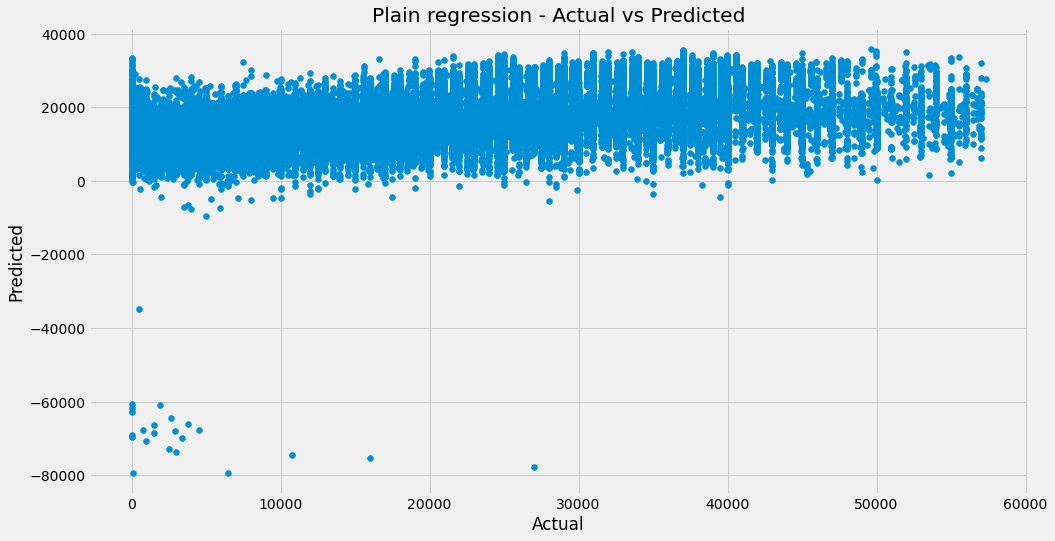

In [31]:
plt.scatter(y_test, reg1_y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Plain regression - Actual vs Predicted');

In [32]:
# Ridge regression model

reg_2 = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
reg_2.fit(X_train, y_train)

reg2_y_train_pred = reg_2.predict(X_train)
reg2_y_test_pred = reg_2.predict(X_test)

reg2_y_train_mse = mean_squared_error(y_train, reg2_y_train_pred)
reg2_y_test_mse = mean_squared_error(y_test, reg2_y_test_pred)

reg2_y_train_rmse = np.sqrt(reg2_y_train_mse)
reg2_y_test_rmse = np.sqrt(reg2_y_test_mse)

reg2_r2_score = r2_score(y_test, reg2_y_test_pred)

print("Train Predictions: ", reg2_y_train_pred.mean())
print("Test Predictions: ", reg2_y_test_pred.mean())
print(" ")
print("Train MSE: ", np.log1p(reg2_y_train_mse))
print("Test MSE: ", np.log1p(reg2_y_test_mse))
print(" ")
print("Train RMSE: ",np.log1p(reg2_y_train_rmse))
print("Test RMSE: ", np.log1p(reg2_y_test_rmse))
print(" ")
print("R2 Score: ", reg2_r2_score )

Train Predictions:  15556.038317290819
Test Predictions:  15562.049023533074
 
Train MSE:  18.66703533815096
Test MSE:  18.674732559501347
 
Train RMSE:  9.333606071949514
Test RMSE:  9.33745434308023
 
R2 Score:  0.21490054300178807


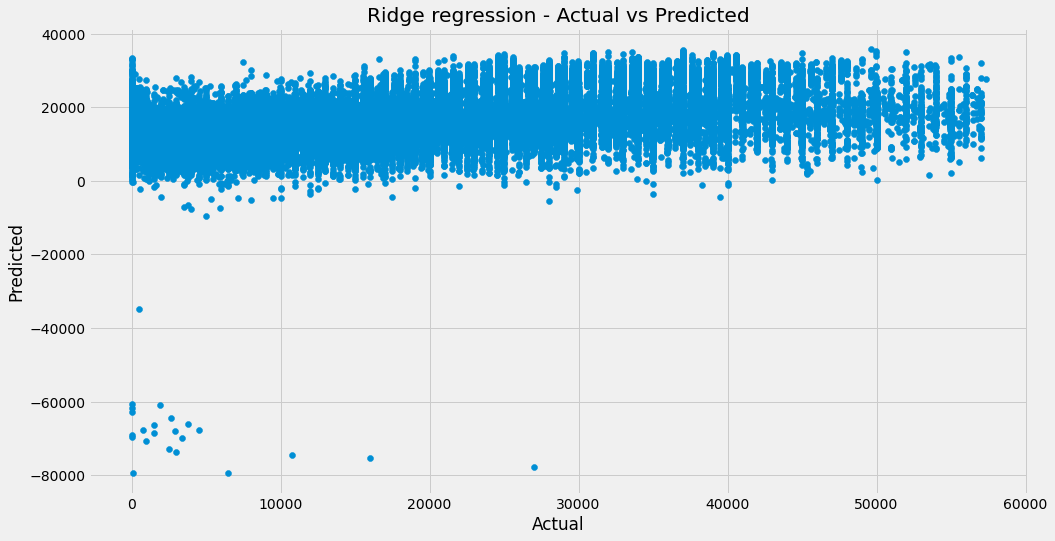

In [33]:
plt.scatter(y_test, reg2_y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge regression - Actual vs Predicted');

In [34]:
# Lasso regression model

reg_3 = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
reg_3.fit(X_train, y_train)

reg3_coefs = reg_3.named_steps['lasso'].coef_

reg3_y_train_pred = reg_3.predict(X_train)
reg3_y_test_pred = reg_3.predict(X_test)

reg3_y_train_mse = mean_squared_error(y_train, reg3_y_train_pred)
reg3_y_test_mse = mean_squared_error(y_test, reg3_y_test_pred)

reg3_y_train_rmse = np.sqrt(reg3_y_train_mse)
reg3_y_test_rmse = np.sqrt(reg3_y_test_mse)

reg3_r2_score = r2_score(y_test, reg3_y_test_pred)

print("Train Predictions: ", reg3_y_train_pred.mean())
print("Test Predictions: ", reg3_y_test_pred.mean())
print(" ")
print("Train MSE: ", np.log1p(reg3_y_train_mse))
print("Test MSE: ", np.log1p(reg3_y_test_mse))
print(" ")
print("Train RMSE: ",np.log1p(reg3_y_train_rmse))
print("Test RMSE: ", np.log1p(reg3_y_test_rmse))
print(" ")
print("R2 Score: ", reg3_r2_score )

Train Predictions:  15556.038317290819
Test Predictions:  15575.569063219082
 
Train MSE:  18.61079744430943
Test MSE:  18.61871925325203
 
Train RMSE:  9.30548964587411
Test RMSE:  9.309450190950095
 
R2 Score:  0.2576676158991158


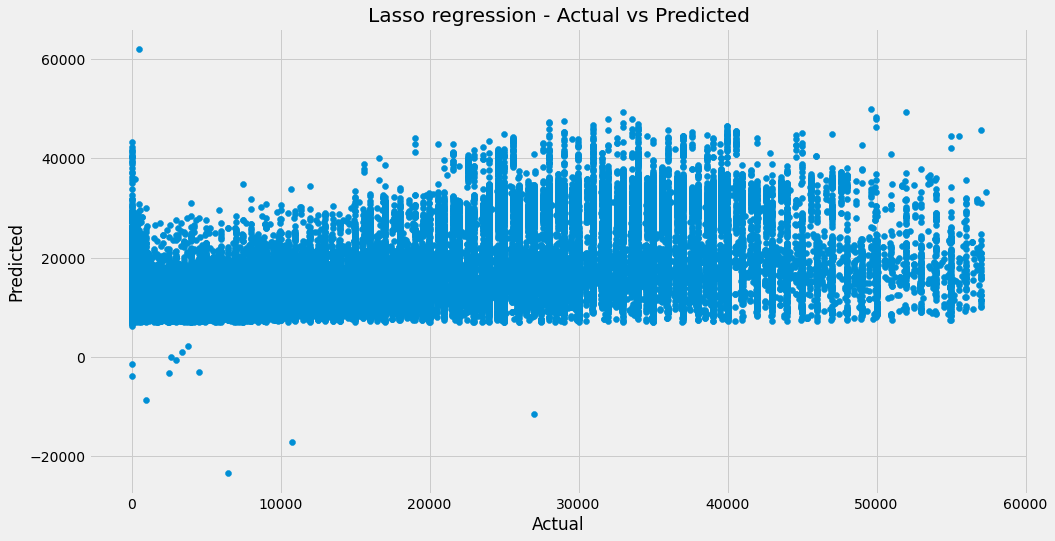

In [35]:
plt.scatter(y_test, reg3_y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso regression - Actual vs Predicted');

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Comparing the MSE, RMSE and R2 scores for different models, we can confirm that Lasso regression model 
# is better in predicting the prices of the cars.
# The value of R2 scores for all model shows that data needs to evaluated again and we need to revisit the 
# data understanding and data preparation phase.
# Many fields were missing the data, and manually filling the data may impact the predictability of the model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Following are some of the observations shared with the dealer.
# Transmission type, year,  No. of cylinders and condition are the main features affecting the car price.
# The price is inversely related to odometer value.
# The mean selling price is 15565.
# The dealer should have inventory of cars with automatic transmission, latest year models and more number of cylinders.
# The less number of milege in odometer gets a higher price.
# Maximum number of cars sold are from year 2018 to 2020.
# The sale of the car with price more than $40,000 is rare.